# Head Trained Denoiser Tested on Pediatric Abdomen: Demonstrating Protocol More Significant than Anatomy

The goal of this study is to train a denoising model on a Low Dose Head CT training dataset and test on a low dose abdomen CT dataset.

This will address the feedback from Reviewer 1 and the AE of whether the difference in pediatric performance is due to anatomic differences or acquisition differences. 

The hypothesis of this experiment is that the head trained denoising model will perform as well as the small-FOV abdomen model (the pediatric protocol).

This supports our method of FOV/texture based augmentation over training more burdensome dedicated pediatric models. If it doesn’t test as well on the abdomen test set that will suggest it’s a mix of both acquisition and anatomic differences.

## Low Dose Head CT Dataset

Generated from `bash make_heads_dataset.sh`

Using [PedSilicoICH](https://github.com/DIDSR/PedSilicoICH)

In [1]:
from LDHeadCTDataset import LDHeadCTDataset

In [2]:
from torchvision.transforms import v2
import torch

base_dir = '/projects01/didsr-aiml/brandon.nelson/pedsilicoICH/head_experiment'
tfms = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=False)])
dset = LDHeadCTDataset(base_dir, patch_size=64, transform=tfms, target_transform=tfms)
dset

Dataset LDHeadCTDataset
    Number of datapoints: 15680
    Root location: /projects01/didsr-aiml/brandon.nelson/pedsilicoICH/head_experiment

In [3]:
dset.metadata

,name,age,intensity,center x,center y,center z,lesion type,mass effect,lesion volume [mL],mA,kVp,views,fov [mm],kernel,image file,mask file,seed,edema,slice
161,case_001,11.5,NaN,NaN,NaN,NaN,NaN,NaN,0,60.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,433015,0,0.0
162,case_001,11.5,NaN,NaN,NaN,NaN,NaN,NaN,0,60.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,433015,0,1.0
163,case_001,11.5,NaN,NaN,NaN,NaN,NaN,NaN,0,60.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,433015,0,2.0
164,case_001,11.5,NaN,NaN,NaN,NaN,NaN,NaN,0,60.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,433015,0,3.0
165,case_001,11.5,NaN,NaN,NaN,NaN,NaN,NaN,0,60.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,433015,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31677,case_099,38.0,NaN,NaN,NaN,NaN,NaN,NaN,0,240.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,366263,0,212.0
31678,case_099,38.0,NaN,NaN,NaN,NaN,NaN,NaN,0,240.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,366263,0,213.0
31679,case_099,38.0,NaN,NaN,NaN,NaN,NaN,NaN,0,240.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,366263,0,214.0
31680,case_099,38.0,NaN,NaN,NaN,NaN,NaN,NaN,0,240.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,366263,0,215.0


/tmp/ipykernel_306606/2385226026.py:14: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  ctshow(np.array(x), fig=f, ax=axs[0], window=window)
/tmp/ipykernel_306606/2385226026.py:16: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  ctshow(np.array(y), fig=f, ax=axs[1], window=window)


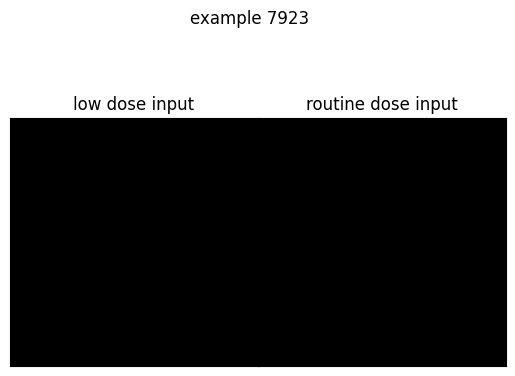

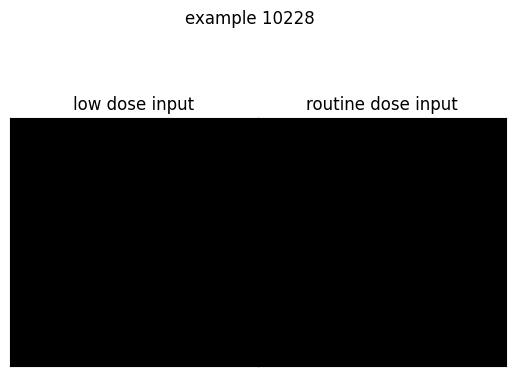

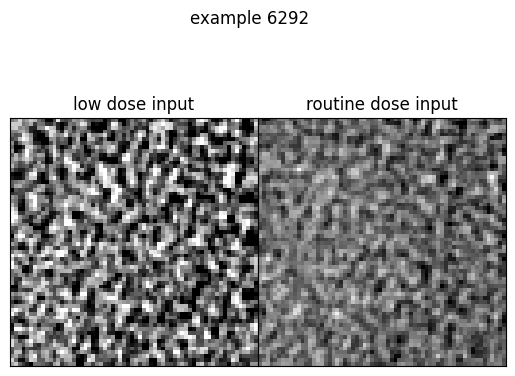

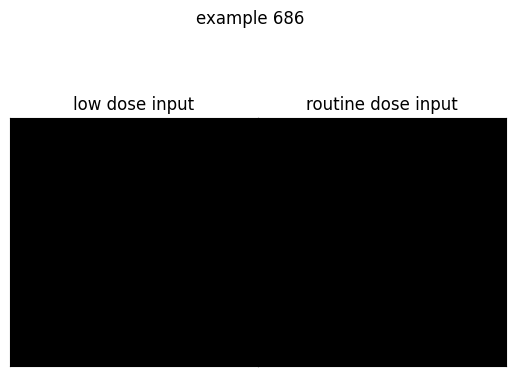

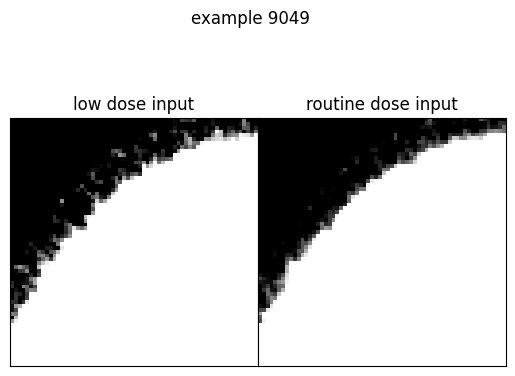

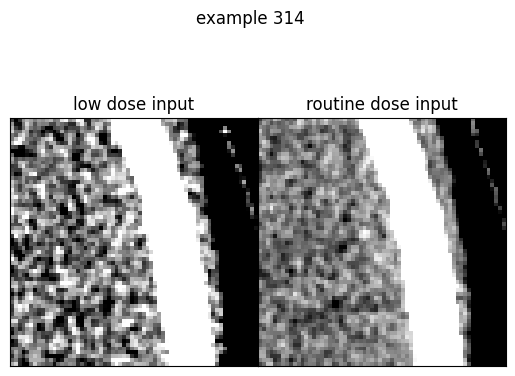

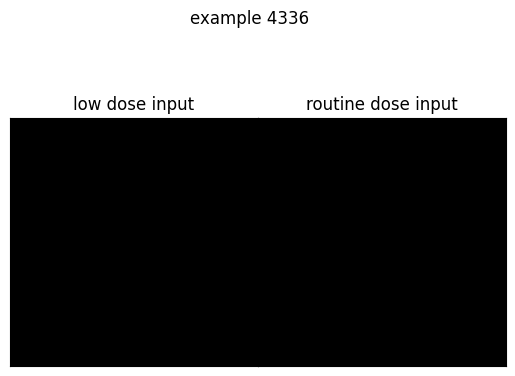

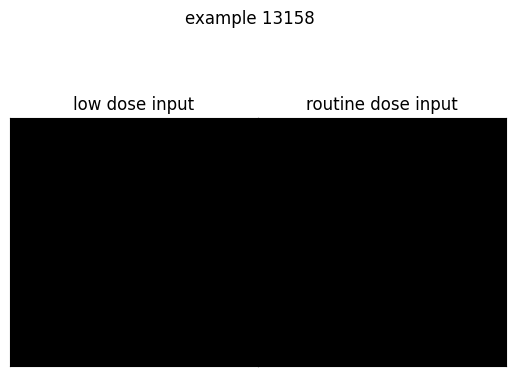

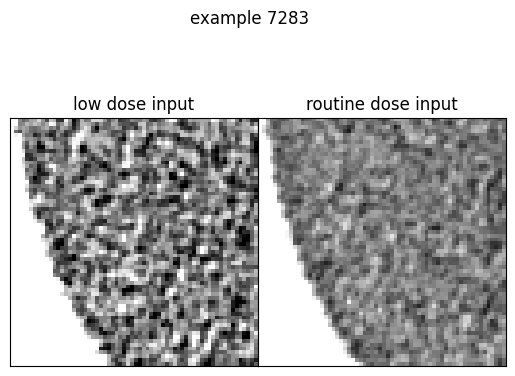

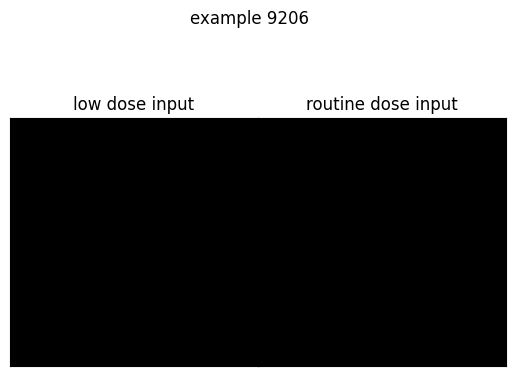

In [4]:
from utils import ctshow
import numpy as np
import matplotlib.pyplot as plt

n_examples = 10
random = np.random.default_rng(43)

for row in range(n_examples):
    idx = random.integers(0, len(dset))
    x, y = dset[idx]
    window = 'brain'
    f, axs = plt.subplots(1, 2, gridspec_kw=dict(hspace=0,wspace=0))
    f.suptitle(f'example {idx}')
    ctshow(np.array(x), fig=f, ax=axs[0], window=window)
    axs[0].set_title('low dose input')
    ctshow(np.array(y), fig=f, ax=axs[1], window=window)
    axs[1].set_title('routine dose input')
    f.show()

Now make a datamodule

In [7]:
%%timeit
for x, y in dl:
    print(x.shape, y.shape)
    break

torch.Size([32, 1, 64, 64]) torch.Size([32, 1, 64, 64])
torch.Size([32, 1, 64, 64]) torch.Size([32, 1, 64, 64])
torch.Size([32, 1, 64, 64]) torch.Size([32, 1, 64, 64])
torch.Size([32, 1, 64, 64]) torch.Size([32, 1, 64, 64])
torch.Size([32, 1, 64, 64]) torch.Size([32, 1, 64, 64])
torch.Size([32, 1, 64, 64]) torch.Size([32, 1, 64, 64])
torch.Size([32, 1, 64, 64]) torch.Size([32, 1, 64, 64])
torch.Size([32, 1, 64, 64]) torch.Size([32, 1, 64, 64])
851 ms ± 76.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


torch.Size([32, 1, 64, 64]) torch.Size([32, 1, 64, 64])


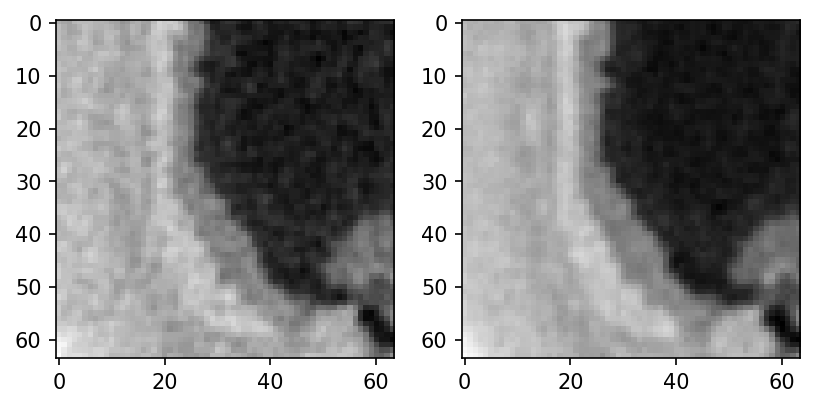

In [12]:
for x, y in dl:
    print(x.shape, y.shape)
    break
idx = 30
f, axs = plt.subplots(1, 2, dpi=150)
axs[0].imshow(x[idx].squeeze(), cmap='gray')
axs[1].imshow(y[idx].squeeze(), cmap='gray')

In [16]:
trainer.test(datamodule=dm)

/home/brandon.nelson/anaconda3/envs/noise_augmentation/lib/python3.12/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/brandon.nelson/anaconda3/envs/noise_augmentati ...
/home/brandon.nelson/anaconda3/envs/noise_augmentation/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at /home/brandon.nelson/Dev/pediatric-CT-noise-texture-augmentation/notebooks/lightning_logs/version_3/checkpoints/epoch=99-step=39200.ckpt
LOCAL_RANK: 0 - CUDA_VI

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss            228.233642578125
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 228.233642578125}]

In [28]:
dm.setup('predict')
for x, y in dm.predict_dataloader():
    break

In [95]:
x.shape, y.shape

(torch.Size([32, 1, 512, 512]), torch.Size([32, 1, 512, 512]))

In [78]:
dm = LDHeadCTDataModule(base_dir, num_workers=5)
model = LitAutoEncoder.load_from_checkpoint('/home/brandon.nelson/Dev/pediatric-CT-noise-texture-augmentation/notebooks/lightning_logs/version_3/checkpoints/epoch=99-step=39200.ckpt', torch_module=RED_CNN())
trainer = L.Trainer()
out = trainer.predict(model=model, datamodule=dm)


/home/brandon.nelson/anaconda3/envs/noise_augmentation/lib/python3.12/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/brandon.nelson/anaconda3/envs/noise_augmentati ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/brandon.nelson/anaconda3/envs/noise_augmentation/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [79]:
model.eval()

LitAutoEncoder(
  (torch_module): RED_CNN(
    (conv1): Conv2d(1, 96, kernel_size=(5, 5), stride=(1, 1))
    (conv2): Conv2d(96, 96, kernel_size=(5, 5), stride=(1, 1))
    (conv3): Conv2d(96, 96, kernel_size=(5, 5), stride=(1, 1))
    (conv4): Conv2d(96, 96, kernel_size=(5, 5), stride=(1, 1))
    (conv5): Conv2d(96, 96, kernel_size=(5, 5), stride=(1, 1))
    (tconv1): ConvTranspose2d(96, 96, kernel_size=(5, 5), stride=(1, 1))
    (tconv2): ConvTranspose2d(96, 96, kernel_size=(5, 5), stride=(1, 1))
    (tconv3): ConvTranspose2d(96, 96, kernel_size=(5, 5), stride=(1, 1))
    (tconv4): ConvTranspose2d(96, 96, kernel_size=(5, 5), stride=(1, 1))
    (tconv5): ConvTranspose2d(96, 1, kernel_size=(5, 5), stride=(1, 1))
    (relu): ReLU()
  )
)

In [81]:
out = trainer.predict(model, x)

/home/brandon.nelson/anaconda3/envs/noise_augmentation/lib/python3.12/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/brandon.nelson/anaconda3/envs/noise_augmentati ...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [94]:
out[0].shape, x.shape

(torch.Size([1, 512, 512]), torch.Size([32, 1, 512, 512]))

/tmp/ipykernel_306606/1019676241.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  im = ctshow(np.array(out[-1][0]), window='brain')


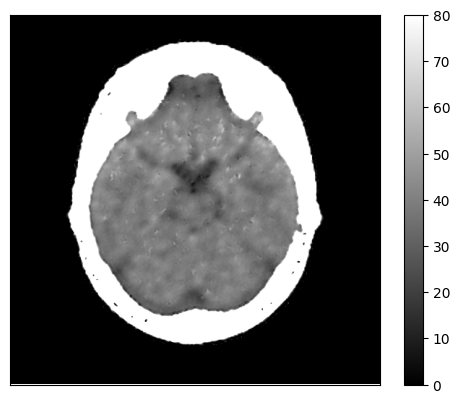

In [ ]:
f, axs = plt.subplots()
im = ctshow(np.array(out[-1][0]), window='brain')
plt.colorbar(im)

In [96]:
from lightning.pytorch.demos.boring_classes import DemoModel, BoringDataModule


In [97]:
DemoModel??

Init signature: DemoModel(out_dim: int = 10, learning_rate: float = 0.02)
Source:        
class DemoModel(LightningModule):
    """
    .. warning::  This is meant for testing/debugging and is experimental.
    """

    def __init__(self, out_dim: int = 10, learning_rate: float = 0.02):
        super().__init__()
        self.l1 = torch.nn.Linear(32, out_dim)
        self.learning_rate = learning_rate

    def forward(self, x: Tensor) -> Tensor:
        return torch.relu(self.l1(x.view(x.size(0), -1)))

    def training_step(self, batch: Any, batch_nb: int) -> STEP_OUTPUT:
        x = batch
        x = self(x)
        return x.sum()

    def configure_optimizers(self) -> torch.optim.Optimizer:
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)
File:           ~/anaconda3/envs/noise_augmentation/lib/python3.12/site-packages/lightning/pytorch/demos/boring_classes.py
Type:           type
Subclasses:     

In [98]:
BoringDataModule??

Init signature: BoringDataModule() -> None
Source:        
class BoringDataModule(LightningDataModule):
    """
    .. warning::  This is meant for testing/debugging and is experimental.
    """

    def __init__(self) -> None:
        super().__init__()
        self.random_full = RandomDataset(32, 64 * 4)

    def setup(self, stage: str) -> None:
        if stage == "fit":
            self.random_train = Subset(self.random_full, indices=range(64))

        if stage in ("fit", "validate"):
            self.random_val = Subset(self.random_full, indices=range(64, 64 * 2))

        if stage == "test":
            self.random_test = Subset(self.random_full, indices=range(64 * 2, 64 * 3))

        if stage == "predict":
            self.random_predict = Subset(self.random_full, indices=range(64 * 3, 64 * 4))

    def train_dataloader(self) -> DataLoader:
        return DataLoader(self.random_train)

    def val_dataloader(self) -> DataLoader:
        return DataLoader(self.random_val)

    